In [7]:
#importer vos librairies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import linear_model #modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score #métriques d'évaluation

In [8]:
#charger les données 
#price_availability.csv
#listings_final.csv
#attention l'individu 589 n'a pas de prix !!
prices = pd.read_csv("./data/price_availability.csv", sep=";")
listings = pd.read_csv("./data/listings_final.csv", sep=";")
listings = listings.drop(589)  
print("Data loaded.")

Data loaded.


In [9]:
#define our input variable X and output variable Y
X = listings.loc[:, ["listing_id", "person_capacity", "bedrooms", "bathrooms" ]]
Y = []

In [10]:
#build the price vector
for i, row in X.iterrows():
    y = 0
    ID = int(row["listing_id"])
    subset = prices[prices["listing_id"] == ID]
    y = subset["local_price"].mean()
    Y.append(y)

#convert into numpy array
Y = np.asarray(Y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((699, 4), (699,), (300, 4), (300,))

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train)

LinearRegression()

In [13]:
#what do you think about the results ?
print('Coefficients beta_j : \n', regr.coef_)
print('Coefficients INTERCEPT beta_0 : \n', regr.intercept_)

Coefficients beta_j : 
 [2.47834609e-06 3.23451085e+01 1.43887639e+01 7.75318453e+01]
Coefficients INTERCEPT beta_0 : 
 -79.79953133672868


In [14]:
X_test

,listing_id,person_capacity,bedrooms,bathrooms
453,14992207,2,1,1.0
794,24564156,2,1,1.0
209,3452604,2,0,1.0
309,8243908,1,1,1.0
741,23233753,5,2,1.0
...,...,...,...,...
314,8525469,8,3,2.5
404,12976143,7,3,2.0
7,5662637,2,1,1.0
155,2158913,2,0,1.0


In [15]:
y_test

array([  79.81038961,  125.        ,   95.45333333,   29.        ,
         82.5883905 ,  123.63829787,  360.        ,  130.        ,
        450.        ,  164.845953  ,   68.35142119,  294.18181818,
         68.08247423,   51.01595745,  170.30548303,   80.24479167,
         73.78249337,  195.        ,  375.0268714 ,  834.96124031,
        850.65633075,   89.        ,  650.        ,   63.38219895,
         83.        ,  190.        ,  202.23514212,   96.6056701 ,
        108.95026178,   50.        ,   28.31937173,  195.        ,
         93.70234987,  474.14258189,  450.        ,  517.0984456 ,
         83.37730871,  395.        ,   79.        ,  129.17493473,
        135.11227154,   51.52785146,  117.22572178,  260.        ,
        618.        ,   42.        ,  180.        ,  160.        ,
        179.67315175,   40.0025641 ,   80.984375  ,  116.09947644,
        429.28645833,   76.06896552,  219.5037594 ,  459.71391076,
        183.0848329 ,  204.39276486,  161.5503876 ,  131.     

In [17]:
#compute y_pred
Y_pred = regr.predict(X_test)
len(Y_pred)

c:\Users\33782\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


300

In [18]:
Y_pred

array([113.96717254, 137.68977495,  70.97927863,  64.89744358,
       245.81666527, 170.4788043 , 561.0179989 , 106.9418946 ,
       383.27653253, 233.75294378, 162.22364018, 612.08191179,
       159.32890963, 251.58804631, 118.1210298 ,  78.77744367,
       124.68010657, 194.48881109, 434.03826221, 790.83639952,
       586.83384388, 171.78524314, 221.95377062, 128.08854869,
       128.62279089, 175.3227481 , 121.6775822 , 154.48438242,
       156.15601944,  69.49655503,  92.87029058, 216.30267547,
       112.59683353, 754.37308581, 455.87067501, 287.66991756,
        67.79340934, 359.1764754 , 129.24823819, 214.40674172,
       169.73401224,  60.79931294, 209.06281997, 236.21743727,
       320.30632589, 123.62663053,  77.81376409, 198.81582295,
        78.94863791, 145.15976783, 127.84082014, 152.26503044,
       224.58908772,  69.26447379, 298.66775754, 164.39766518,
       214.32584501, 185.47409534, 218.11339591, 119.70295068,
        77.9772229 , 169.06272431, 141.63669477, 263.08

In [19]:
y_test

array([  79.81038961,  125.        ,   95.45333333,   29.        ,
         82.5883905 ,  123.63829787,  360.        ,  130.        ,
        450.        ,  164.845953  ,   68.35142119,  294.18181818,
         68.08247423,   51.01595745,  170.30548303,   80.24479167,
         73.78249337,  195.        ,  375.0268714 ,  834.96124031,
        850.65633075,   89.        ,  650.        ,   63.38219895,
         83.        ,  190.        ,  202.23514212,   96.6056701 ,
        108.95026178,   50.        ,   28.31937173,  195.        ,
         93.70234987,  474.14258189,  450.        ,  517.0984456 ,
         83.37730871,  395.        ,   79.        ,  129.17493473,
        135.11227154,   51.52785146,  117.22572178,  260.        ,
        618.        ,   42.        ,  180.        ,  160.        ,
        179.67315175,   40.0025641 ,   80.984375  ,  116.09947644,
        429.28645833,   76.06896552,  219.5037594 ,  459.71391076,
        183.0848329 ,  204.39276486,  161.5503876 ,  131.     

In [20]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, Y_pred))
# Coefficient de détermination R2
print('Variance score: %.2f' % r2_score(y_test, Y_pred))

Mean squared error: 19631.83
Variance score: 0.42


In [21]:
#compute the RMSE for more intuitive results
np.sqrt(19631.83)

140.1136324559463

In [22]:
H = np.matmul(X_train.values, np.linalg.solve(np.dot(X_train.T.values, X_train.values), X_train.T.values))

c:\Users\33782\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


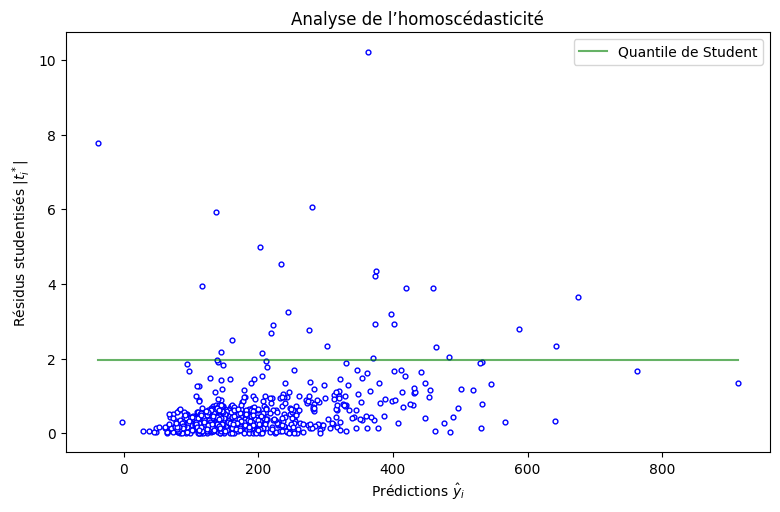

In [23]:
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train.values, np.linalg.solve(np.dot(X_train.T.values, X_train.values), X_train.T.values))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()